In [1]:
dataRaw = '../rawData'
label = ['Good', 'PotentiallyUseful', 'Bad']

from xml.etree import ElementTree as ET
import os
import pickle as pkl

In [4]:
with open('../data/dataset.pkl', 'rb') as fr:
    dataset = pkl.load(fr)

# samples num

In [6]:
train15_num = len(dataset['15train.xml'])
dev15_num = len(dataset['15dev.xml'])
test15_num = len(dataset['15test.xml'])

train17_num = len(dataset['16train1.xml'])+len(dataset['16train2.xml'])+ train15_num + dev15_num + test15_num + len(dataset['16dev.xml'])
dev17_num = len(dataset['16test.xml'])
test17_num = len(dataset['17test.xml'])

print('the number of samples in SemEval2015:', train15_num, dev15_num, test15_num)
print('the number of samples in SemEval2017:', train17_num, dev17_num, test17_num)

the number of samples in SemEval2015: 14892 1529 1876
the number of samples in SemEval2017: 38097 3150 2930


# questions number

In [10]:
train15set = set()
dev15set = set()
test15set = set()

train17set = set()
dev17set = set()
test17set = set()

[train15set.add(e[0].split('_')[0]) for e in dataset['15train.xml']]
[dev15set.add(e[0].split('_')[0]) for e in dataset['15dev.xml']]
[test15set.add(e[0].split('_')[0]) for e in dataset['15test.xml']]

[train17set.add('_'.join(e[0].split('_')[0:2])) for e in dataset['16train1.xml']+dataset['16train2.xml']+ dataset['16dev.xml']]
train17set.update(train15set)
train17set.update(dev15set)
train17set.update(test15set)
[dev17set.add('_'.join(e[0].split('_')[0:2])) for e in dataset['16test.xml']]
[test17set.add('_'.join(e[0].split('_')[0:2])) for e in dataset['17test.xml']]

print('the number of questions in SemEval2015:', len(train15set), len(dev15set), len(test15set))
print('the number of questions in SemEval2017:', len(train17set), len(dev17set), len(test17set))


the number of questions in SemEval2015: 2479 290 319
the number of questions in SemEval2017: 5068 315 293


# sentence length

In [31]:
train15_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['15train.xml']]
dev15_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['15dev.xml']]
test15_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['15test.xml']]

train17_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['16train1.xml']+dataset['16train2.xml']+ dataset['16dev.xml']]
train17_qa_length += train15_qa_length + dev15_qa_length + test15_qa_length
dev17_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['16test.xml']]
test17_qa_length = [[len(e[1]), len(e[2]), len(e[3])] for e in dataset['17test.xml']]

In [32]:
train15_qa_length = [a for a in zip(*train15_qa_length)]
dev15_qa_length = [a for a in zip(*dev15_qa_length)]
test15_qa_length = [a for a in zip(*test15_qa_length)]

train17_qa_length = [a for a in zip(*train17_qa_length)]
dev17_qa_length = [a for a in zip(*dev17_qa_length)]
test17_qa_length = [a for a in zip(*test17_qa_length)]

In [33]:
length15 = [train15_qa_length, dev15_qa_length, test15_qa_length]
length17 = [train17_qa_length, dev17_qa_length, test17_qa_length]

print('max length of subject in 15:', [max(length15[i][0]) for i in range(3)])
print('max length of body in 15:', [max(length15[i][1]) for i in range(3)])
print('max length of answer in 15:', [max(length15[i][2]) for i in range(3)])

print('max length of subject in 17:', [max(length17[i][0]) for i in range(3)])
print('max length of body in 17:', [max(length17[i][1]) for i in range(3)])
print('max length of answer in 17:', [max(length17[i][2]) for i in range(3)])

max length of subject in 15: [24, 20, 23]
max length of body in 15: [96, 80, 91]
max length of answer in 15: [1386, 1224, 581]
max length of subject in 17: [24, 21, 21]
max length of body in 17: [101, 106, 109]
max length of answer in 17: [1386, 204, 351]


In [34]:
print('min length of subject in 15:', [min(length15[i][0]) for i in range(3)])
print('min length of body in 15:', [min(length15[i][1]) for i in range(3)])
print('min length of answer in 15:', [min(length15[i][2]) for i in range(3)])

print('min length of subject in 17:', [min(length17[i][0]) for i in range(3)])
print('min length of body in 17:', [min(length17[i][1]) for i in range(3)])
print('min length of answer in 17:', [min(length17[i][2]) for i in range(3)])

min length of subject in 15: [0, 1, 0]
min length of body in 15: [0, 4, 0]
min length of answer in 15: [0, 0, 0]
min length of subject in 17: [0, 1, 1]
min length of body in 17: [0, 3, 3]
min length of answer in 17: [0, 0, 0]


In [39]:
print('average length of subject in 15:', [sum(length15[i][0])/len(length15[i][0]) for i in range(3)])
print('average length of body in 15:', [sum(length15[i][1])/len(length15[i][1]) for i in range(3)])
print('average length of answer in 15:', [sum(length15[i][2])/len(length15[i][2]) for i in range(3)])

print('average length of subject in 17:', [sum(length17[i][0])/len(length17[i][0]) for i in range(3)])
print('average length of body in 17:', [sum(length17[i][1])/len(length17[i][1]) for i in range(3)])
print('average length of answer in 17:', [sum(length17[i][2])/len(length17[i][2]) for i in range(3)])

average length of subject in 15: [5.342264302981467, 5.025506867233486, 5.197228144989339]
average length of body in 15: [35.270950846091864, 35.538260300850226, 34.28464818763326]
average length of answer in 15: [29.852269674993284, 29.508829300196208, 30.3091684434968]
average length of subject in 17: [5.261857889072631, 4.885714285714286, 4.996587030716723]
average length of body in 17: [40.141769693151694, 43.00952380952381, 47.80204778156997]
average length of answer in 17: [32.411318476520464, 32.43746031746032, 34.61365187713311]


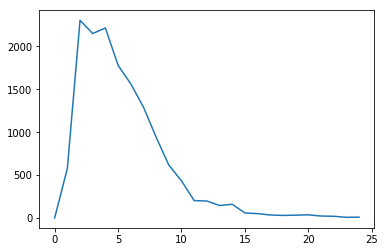

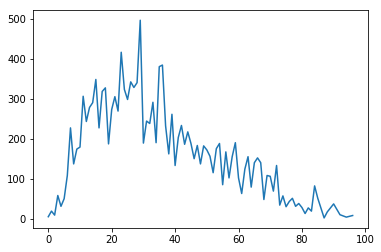

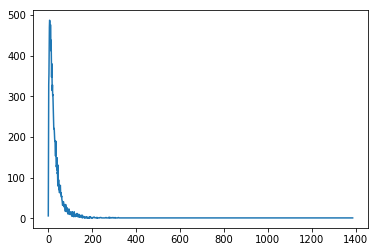

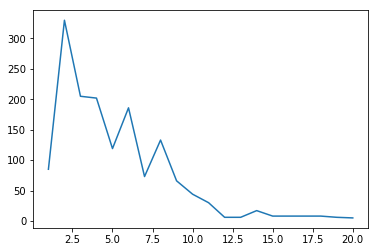

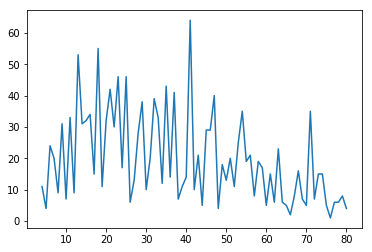

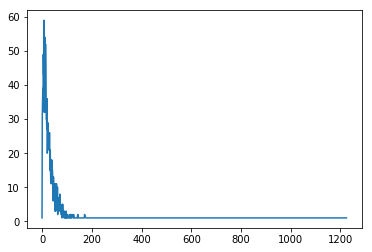

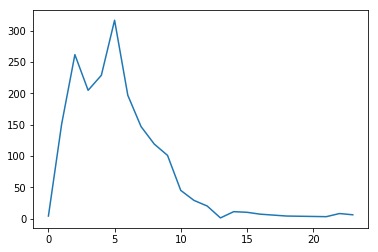

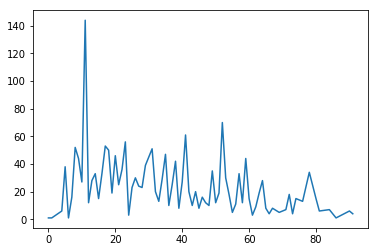

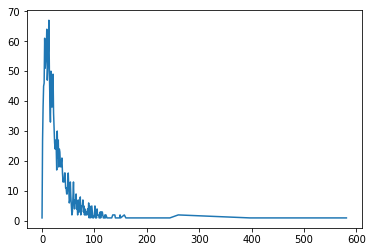

In [41]:
from collections import Counter
import matplotlib.pyplot as plt

count15 = [[sorted(Counter(b).items(), key=lambda x:x[0]) for b in a] for a in length15] 
count17 = [[sorted(Counter(b).items(), key=lambda x:x[0]) for b in a] for a in length17]
num = 1
for data in count15:
    for sentence in data:
        plt.figure(num)
        plt.plot(*zip(*sentence))
        plt.show()
        
